# Bayesian Statistics for Physicists: 04 Bayesian updating examples

## Contents of the BSFP series

<ul>
    <li><a href="BSFP_01_Overview_and_setup.ipynb">01 Overview and Setup</a>
    <li><a href="BSFP_02_Basics.ipynb">02 Bayesian basics</a>
    <li><a href="BSFP_03_Choosing_priors.ipynb">03 Choosing priors</a>
    <li><a href="BSFP_04_Bayesian_updating.ipynb">04 Examples of Bayesian updating</a>
    <li><a href="BSFP_05_Sampling.ipynb">05 Sampling</a>
    <li><a href="BSFP_06_Model_selection_and_mixing.ipynb">06 Model selection, mixing, ...</a>
    <li><a href="BSFP_07_Gaussian_processes.ipynb">07 Gaussian processes</a>
    <li><a href="BSFP_08_Machine_learning.ipynb">08 Machine learning</a>
    <li><a href="BSFP_A01_Appendices.ipynb">A01 Appendices: reference, vocabulary, notation</a>
</ul>

<hr>

## <a name="Overview">Overview of Bayesian updating examples</a>

$  \newcommand{\thetavec}{\boldsymbol{\theta}}$

Recall Bayes' theorem with $\thetavec$ the vector of parameters we seek and information $I$ is kept implicit.

$$
  \overbrace{p(\thetavec \mid \textrm{data},I)}^{\textrm{posterior}} =
  \frac{\color{red}{\overbrace{p(\textrm{data} \mid \thetavec,I)}^{\textrm{likelihood}}} \times
   \color{blue}{\overbrace{p(\thetavec \mid I)}^{\textrm{prior}}}}
   {\color{darkgreen}{\underbrace{p(\textrm{data} \mid I)}_{\textrm{evidence}}}}
$$

If we view the prior as the initial information we have about $\thetavec$, summarized as a probability density function, then Bayes' theorem tells us how to <em>update</em> that information after observing some data: this is the posterior pdf.  Here we will give some examples of how this plays out in practice.

Last revised: 14-Oct-2018 by Dick Furnstahl [furnstahl.1@osu.edu].
<hr>

## <a name="Contents">Contents of Bayesian updating examples notebook</a> 

<ul>
    <li><a href="#Updating">Bayesian updating examples</a>  
</ul>

<hr>

## <a name="Python">Python/Jupyter set up</a>

See <a href="BSFP_01_Overview_and_setup.ipynb">Part 01</a> for overall installation and setup.

In [1]:
# set up for plots in this notebook using matplotlib (there are other plotting choices)
%matplotlib inline   

In [2]:
import numpy as np

import scipy.stats as stats
from scipy.stats import norm, uniform

import matplotlib.pyplot as plt
#plt.style.use('seaborn') # pretty matplotlib plots

import corner
import pymc3 as pm


/Users/furnstah/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# make font adjustments
#plt.rcParams['font.size'] = 12
#plt.rcParams['legend.fontsize'] = 'medium'
#plt.rcParams['figure.titlesize'] = 'medium'
plt.rcdefaults()  # revert to defaults for now

In [4]:
%%html  
<!-- Use html cell magic to add css styling -->
<style>
  em {
      color: red;
  }
  dd {
      margin-left: 15px;
  }
  .red{color: red}
  .blue{color: blue}
</style>

In [5]:
#%%javascript
#IPython.OutputArea.auto_scroll_threshold = 9999;

## <a name="Updating">Bayesian updating examples</a>

### Determining the bias of a coin

The idea here is that we are observing successive flips of a coin, which is a proxy for any process that has a binary outcome.  There is a definite true probability for getting heads, which we'll label $p_h$, but we don't know what it is.  We start with a preconceived notion of the probability expressed in terms of a prior pdf for $p_h$, i.e., $p(p_h)$.  With each flip of the coin, we have more information, so our goal is to <em>update</em> our expectation of $p_h$, meaning we find the posterior $p(p_h\mid \mbox{\#\,tosses, \# heads 

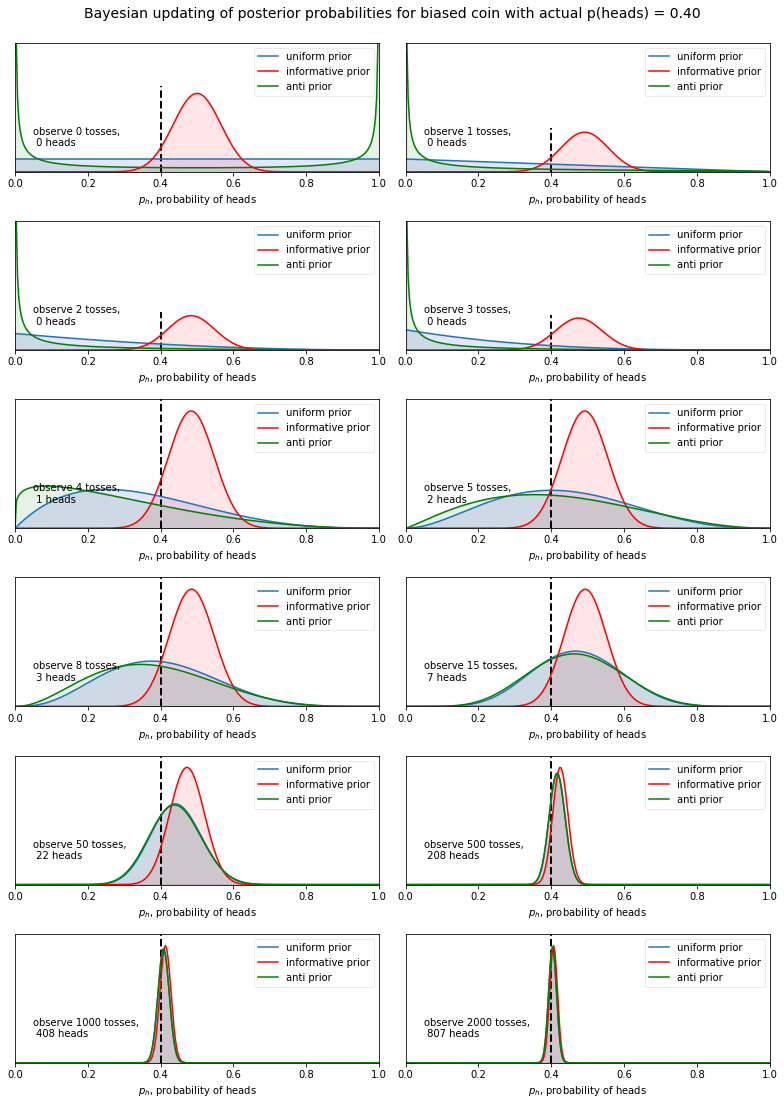

In [8]:
%matplotlib inline
# adapted from  https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 15)

import scipy.stats as stats

# If the coin is fair, prob_heads = 0.5 but you can set it to what you want.
prob_heads = 0.4

# hyperparameters for several different priors
# prior 1 is uniform in [0,1]
alpha_1 = 1
beta_1 = 1
# prior 2 is concentrated near 0.5 with very small tails
alpha_2 = 30
beta_2 = 30
# prior 3 is peaked at ends, but allows for probability everywhere
alpha_3 = .2
beta_3 = .2

# Calculate Bayesian updating using the conjugate prior for binomial, which is a beta distribution
dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500, 1000, 2000]
data = stats.bernoulli.rvs(prob_heads, size=n_trials[-1])  # heads or tails, 1 or 0
x = np.linspace(0, 1, 301) # mesh for posterior plots

for k, N in enumerate(n_trials):  # enumerate creates a tuple with a counter for each n_trials entry
    heads = data[:N].sum()   # add up the number of 1s = number of heads
    # update using the conjugate prior, which is a beta distribution: beta(x,alpha+heads,beta+(N-heads))
    y_1 = dist.pdf(x, alpha_1 + heads, beta_1 + N - heads)    
    y_2 = dist.pdf(x, alpha_2 + heads, beta_2 + N - heads)   
    y_3 = dist.pdf(x, alpha_3 + heads, beta_3 + N - heads)   
    y_max = np.max([y_1.max(), y_2.max()])  # default y_3 distribution has two high max at endpoints for plot

    # now make the plots!
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p_h$, probability of heads") 
    plt.setp(sx.get_yticklabels(), visible=False)
    plt.yticks([])
    plt.plot(x, y_1, label="uniform prior")
    plt.fill_between(x, 0, y_1, color="blue", alpha=0.1)
    plt.plot(x, y_2, label="informative prior", color="r")
    plt.fill_between(x, 0, y_2, color="red", alpha=0.1)
    plt.plot(x, y_3, label="anti prior", color="g")
    plt.fill_between(x, 0, y_3, color="green", alpha=0.1)
    plt.vlines(prob_heads, 0, 1.1*y_max, color="k", linestyles="--", lw=2)
    plt.annotate("observe {:d} tosses,\n {:d} heads".format(N, heads), xy=(0.05,0.35), 
                 xycoords='axes fraction', horizontalalignment='left',verticalalignment='top')
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)

figure_title = "Bayesian updating of posterior probabilities for biased coin with actual p(heads) = {:1.2f}".format(prob_heads)
plt.suptitle(figure_title,
             y=1.02,
             fontsize=14)

plt.tight_layout()

### Radioactive decay problem (lighthouse problem)